# PROBLEM STATEMENT

CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:

- Airplanes
- Cars
- Birds
- Cats
- Deer
- Dogs
- Frogs
- Horses
- Ships
- Trucks
The dataset stands for the Canadian Institute For Advanced Research (CIFAR)

CIFAR-10 is widely used for machine learning and computer vision applications.
The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
Images have low resolution (32x32).
Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

# STEP-1: IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

# STEP-2: VISUALIZE THE DATA

[0]


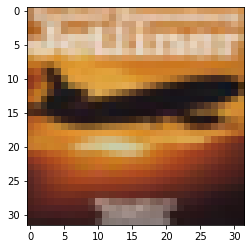

In [7]:
i=2010
plt.imshow(X_train[i])
print(y_train[i])

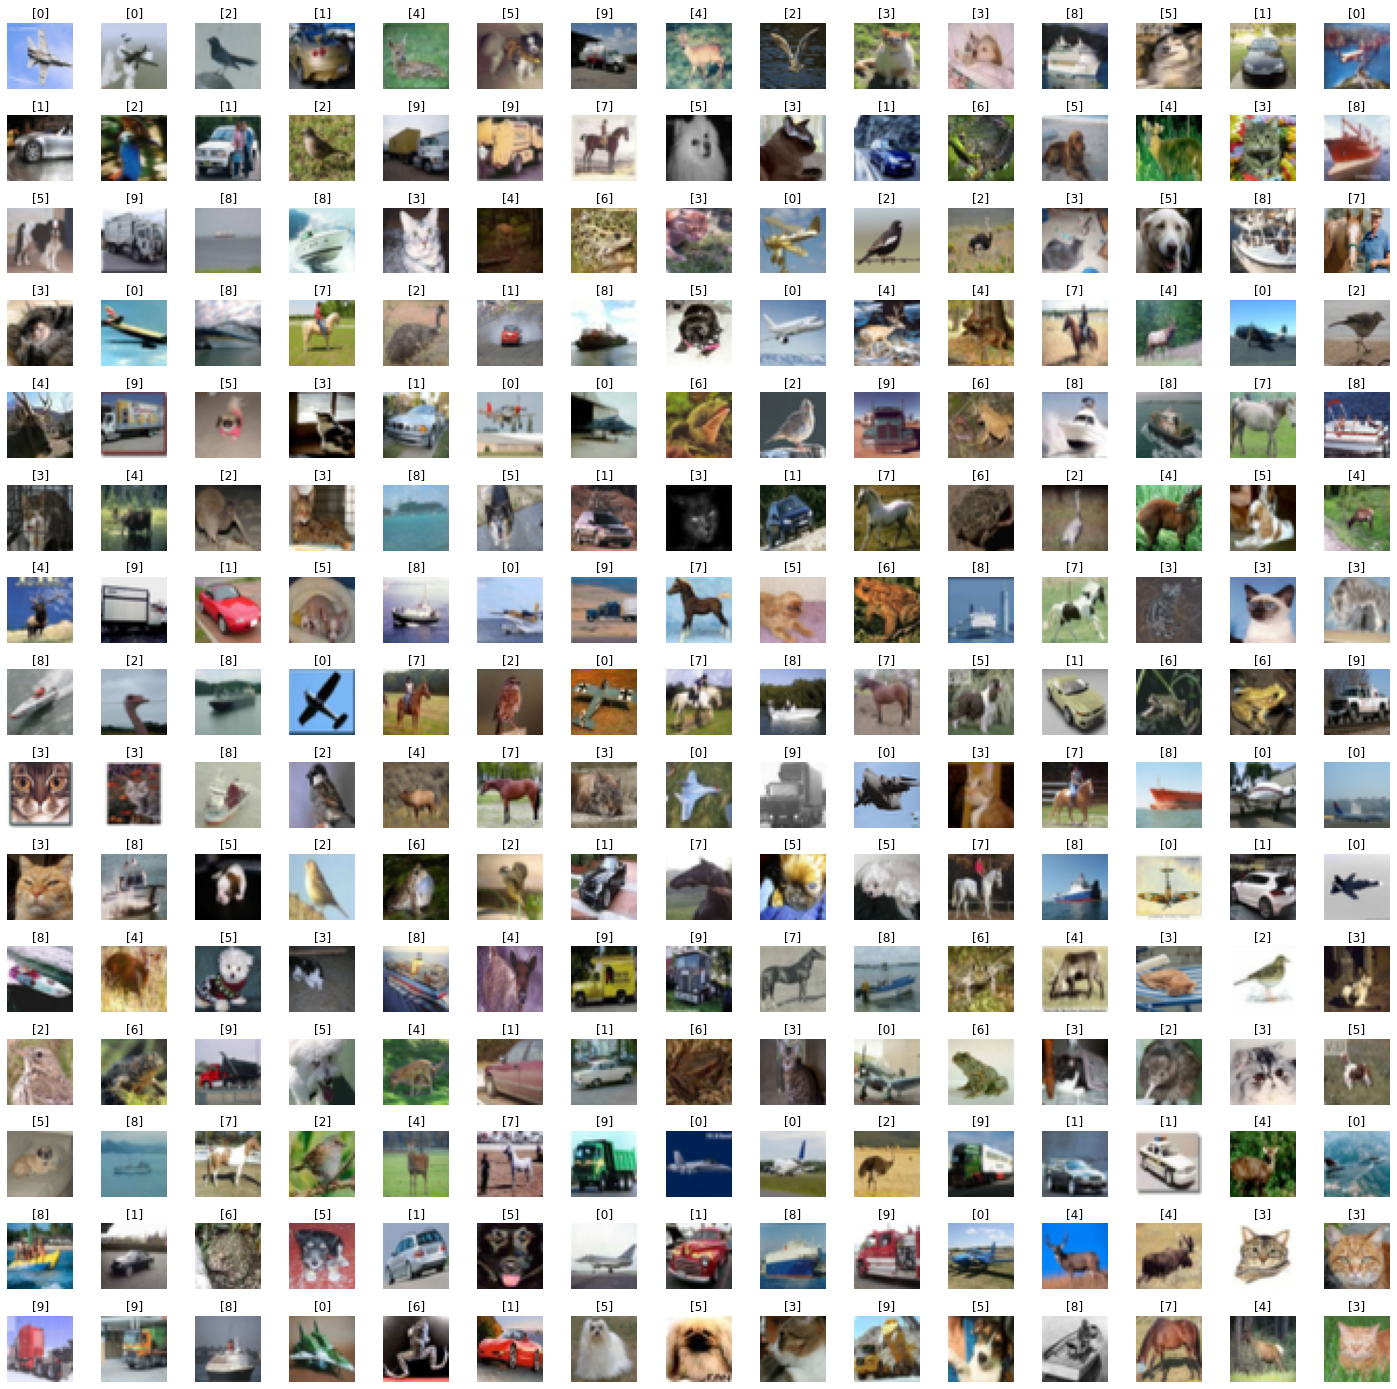

In [8]:
W_grid=15
L_grid=15
fig,axes=plt.subplots(L_grid,W_grid,figsize=(25,25))
axes=axes.ravel()#use to flatten the matrix
n_training=len(X_train)

for i in np.arange(0,L_grid*W_grid):
    index=np.random.randint(0,n_training)#pick a random number
    axes[i].imshow(X_train[index])#to show the images of that index which is randomly generated
    axes[i].set_title(y_train[index])#to print the label of image as well
    axes[i].axis('off')# to remove the grid
plt.subplots_adjust(hspace=0.4)#to give spacing between images

In [9]:
n_training

50000

# STEP-3: DATA PREPARATION

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
number_cat=10

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
import keras
y_train=keras.utils.to_categorical(y_train,number_cat)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_test=keras.utils.to_categorical(y_test,number_cat)

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [17]:
X_train=X_train/225
X_test=X_test/225

In [18]:
X_train

array([[[[0.26222223, 0.27555555, 0.28      ],
         [0.19111112, 0.20444444, 0.2       ],
         [0.22222222, 0.21333334, 0.19111112],
         ...,
         [0.7022222 , 0.58666664, 0.48      ],
         [0.6755555 , 0.5555556 , 0.45333335],
         [0.6577778 , 0.5511111 , 0.45777777]],

        [[0.07111111, 0.08888889, 0.08888889],
         [0.        , 0.        , 0.        ],
         [0.08      , 0.03555556, 0.        ],
         ...,
         [0.5466667 , 0.3911111 , 0.24444444],
         [0.5288889 , 0.36888888, 0.22222222],
         [0.5422222 , 0.38666666, 0.25333333]],

        [[0.11111111, 0.10666667, 0.09333333],
         [0.07111111, 0.03111111, 0.        ],
         [0.21777777, 0.12      , 0.03555556],
         ...,
         [0.52444446, 0.37333333, 0.22222222],
         [0.53333336, 0.37333333, 0.22222222],
         [0.48444444, 0.32444444, 0.18666667]],

        ...,

        [[0.92444444, 0.75555557, 0.42666668],
         [0.8933333 , 0.68      , 0.15111111]

In [19]:
X_train.shape

(50000, 32, 32, 3)

In [20]:
Input_shape=X_train.shape[1:]

In [21]:
Input_shape

(32, 32, 3)

# STEP-4: TRAIN THE MODEL

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard



In [23]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu',input_shape=Input_shape))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024,activation = 'relu'))

cnn_model.add(Dense(units = 1024,activation = 'relu'))

cnn_model.add(Dense(units = 10,activation = 'softmax'))

In [25]:
cnn_model.compile(loss='categorical_crossentropy', optimizer ='adam',metrics=['accuracy'])

In [26]:
history = cnn_model.fit(X_train, y_train, epochs = 20, shuffle = True)

Epoch 1/20


1563/1563 [==============================] - 253s 158ms/step - loss: 1.5760 - accuracy: 0.4195
Epoch 2/20
1563/1563 [==============================] - 245s 157ms/step - loss: 1.2155 - accuracy: 0.5640
Epoch 3/20
1563/1563 [==============================] - 242s 155ms/step - loss: 1.0409 - accuracy: 0.6309
Epoch 4/20
1563/1563 [==============================] - 244s 156ms/step - loss: 0.9299 - accuracy: 0.6712
Epoch 5/20
1563/1563 [==============================] - 235s 150ms/step - loss: 0.8538 - accuracy: 0.6994
Epoch 6/20
1563/1563 [==============================] - 242s 155ms/step - loss: 0.8005 - accuracy: 0.7167
Epoch 7/20
1563/1563 [==============================] - 250s 160ms/step - loss: 0.7499 - accuracy: 0.7340
Epoch 8/20
1563/1563 [==============================] - 239s 153ms/step - loss: 0.7117 - accuracy: 0.7480
Epoch 9/20
1563/1563 [==============================] - 243s 155ms/step - loss: 0.6789 - accuracy: 0.7581
Epoch 10/20
1563/1563 [=====================

# STEP-5: EVALUATE THE MODEL

In [27]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 8s 23ms/step - loss: 0.7738 - accuracy: 0.7639
Test Accuracy: 0.7638999819755554


In [28]:
# predicted_classes=cnn_model.predict().argmax()
# predicted_classes
predicted_probs = cnn_model.predict(X_test)
predicted_classes = predicted_probs.argmax(axis=-1)
print(predicted_classes)

313/313 [==============================] - 7s 22ms/step
[3 8 8 ... 5 1 7]


In [29]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [30]:
y_test=y_test.argmax(1)

In [31]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

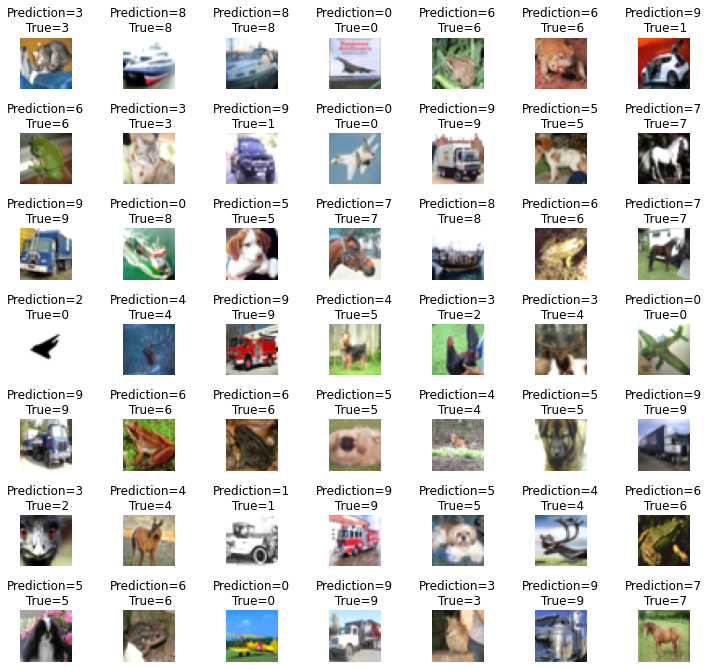

In [33]:
L=7
W=7
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction={}\n True={}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)

<AxesSubplot:>

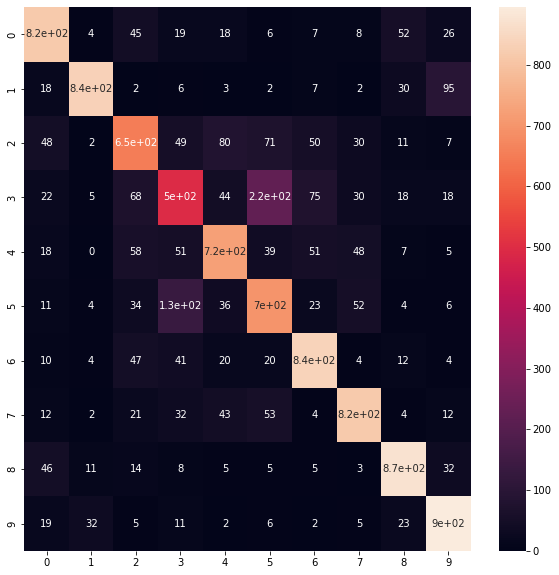

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,predicted_classes)
cm
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

# STEP-6: SAVING THE MODEL

In [38]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path=os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

C:\Users\hp\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# STEP-7: IMPROVING THE MODEL WITH DATA AUGMENTATION

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 
- Augmentations also include shifting and changing the brightness of the images.

# STEP-7.1 DATA AUGMENTATION FOR THE CIFAR-10 DATASET

In [40]:
import keras
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [42]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [43]:
X_train.shape

(50000, 32, 32, 3)

In [46]:
n = 8
X_train_sample=X_train[:n]

In [47]:
X_train_sample.shape

(8, 32, 32, 3)

In [48]:
from keras.preprocessing.image import ImageDataGenerator
dataget_train=ImageDataGenerator(rotation_range=90)
dataget_train.fit(X_train)

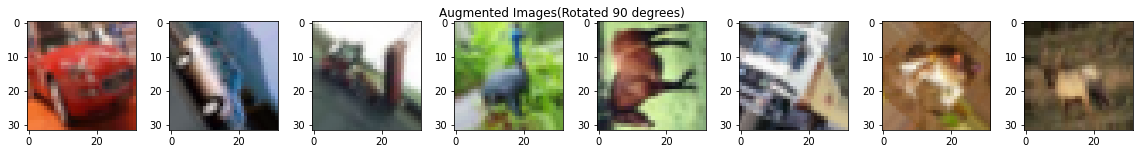

In [53]:
from PIL import Image

fig=plt.figure(figsize=(20,2))
for x_batch in dataget_train.flow(X_train_sample,batch_size=n):
    for i in range(0,n):
        ax=fig.add_subplot(1,n,i+1)
        ax.imshow(Image.fromarray(np.uint8(x_batch[i])))
    fig.suptitle('Augmented Images(Rotated 90 degrees)')
    plt.show()
    break;

# STEP-7.2 MODEL TRAINING USING AUGMENTED DATASET

In [54]:
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                            )

In [55]:
datagen.fit(X_train)

In [56]:
cnn_model.fit_generator(datagen.flow(X_train, y_train,batch_size=32),epochs=2)

C:\Users\hp\AppData\Local\Temp/ipykernel_17736/666225082.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model.fit_generator(datagen.flow(X_train, y_train,batch_size=32),epochs=2)


Epoch 1/2
1563/1563 [==============================] - 199s 127ms/step - loss: nan - accuracy: 0.6430
Epoch 2/2
1563/1563 [==============================] - 187s 119ms/step - loss: nan - accuracy: 1.0000


In [60]:
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path=os.path.join(directory, 'keras_cifar10_trained_model_Augmented.h5')
cnn_model.save(model_path)